___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# BankNotes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('banknotes.csv')
df

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...,...
195,1,215.0,130.4,130.3,9.9,12.1,139.6
196,1,215.1,130.3,129.9,10.3,11.5,139.7
197,1,214.8,130.3,130.4,10.6,11.1,140.0
198,1,214.7,130.7,130.8,11.2,11.2,139.4


In [5]:
# Saber cuantos son falsos o verdaderos - Conjunto equilibrado 

df['conterfeit'].value_counts()

conterfeit
0    100
1    100
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [7]:
df.describe()

# Rangos muy diferentes ya que KNN mide distancias

# Hay que escalar las columnas para que tengas una magnitud parecida

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


In [8]:
# Normalizar los datos

from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
# Normalizar los datos menos el dato objetivo

scaler.fit(df.drop('conterfeit',axis=1))

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [11]:
scaled_features = scaler.transform(df.drop('conterfeit',axis=1))
scaled_features

array([[-0.25558323,  2.43945206,  2.83704322, -0.28973195, -1.18673534,
         0.44937213],
       [-0.78804829, -1.17043716, -0.63638092, -0.91430383, -1.43644293,
         1.05839535],
       [-0.25558323, -1.17043716, -0.63638092, -0.49792258, -1.31158914,
         1.49341194],
       ...,
       [-0.25558323,  0.49566556,  1.10033115,  0.82061805,  0.56121782,
        -0.42066104],
       [-0.52181576,  1.6064007 ,  2.09273805,  1.2369993 ,  0.68607161,
        -0.94268094],
       [-1.58674587, -0.61506959, -0.14017747,  0.54303055,  1.06063301,
        -0.76867431]], shape=(200, 6))

In [12]:
# Crear train/test

from sklearn.model_selection import train_test_split

In [13]:
# ENTRENAMIENTO; VALIDACIÓN, PRUEBA

# SPLIT DIVIDE EN 2, POR LO QUE HABRIA QUE USAR OTRO SPLIT

X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,df['conterfeit'],test_size=0.33, random_state=42)

In [14]:
# CREAR MODELO CLASIFICADOR

from sklearn.neighbors import KNeighborsClassifier 

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
# ENTRENAR

knn.fit(X_train, Y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [17]:
# PREDICCIONES SOBRE DATOS QUE NO CONOCE

pred = knn.predict(X_test)
pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [18]:
# PARA COMPROBAR SI LA PREDICCIÖN ES BUENA O NO; HAY QUE COMPARAR CON LOS VALORES REALES Y_TEST

Y_test

95     0
15     0
30     0
158    1
128    1
      ..
97     0
31     0
12     0
35     0
119    1
Name: conterfeit, Length: 66, dtype: int64

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print(confusion_matrix(Y_test,pred))

#true positive (1), false positive (eren 0 i s'ha predit 1
#false negative (eren 1 i s'ha predit 0), true negative (0, eren 0 i s'ha predit 0)

[[34  1]
 [ 0 31]]


In [21]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.98        31

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.98        66
weighted avg       0.99      0.98      0.98        66



In [22]:
rati_error = []

for i in range(1,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    rati_error.append(np.mean(pred_i != Y_test))

rati_error

[np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.030303030303030304),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.015151515151515152),
 np.float64(0.030303030303030304),
 np.float64(0.045454545454545456),
 np.float64(0.045454545454545456),
 np.float64(0.045454545454545456),
 np.float64(0.045454545454545456)]

In [23]:
df_errors = pd.DataFrame(pd.Series(index=range(1,50,2), data=rati_error))
df_errors

,0
1,0.015152
3,0.015152
5,0.015152
7,0.015152
9,0.015152
11,0.015152
13,0.015152
15,0.015152
17,0.015152
19,0.015152


<Axes: >

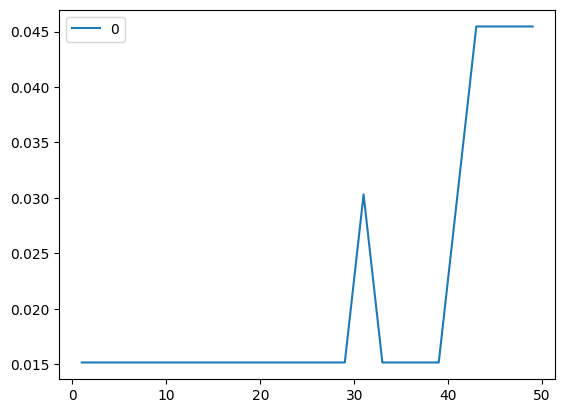

In [24]:
df_errors.plot()

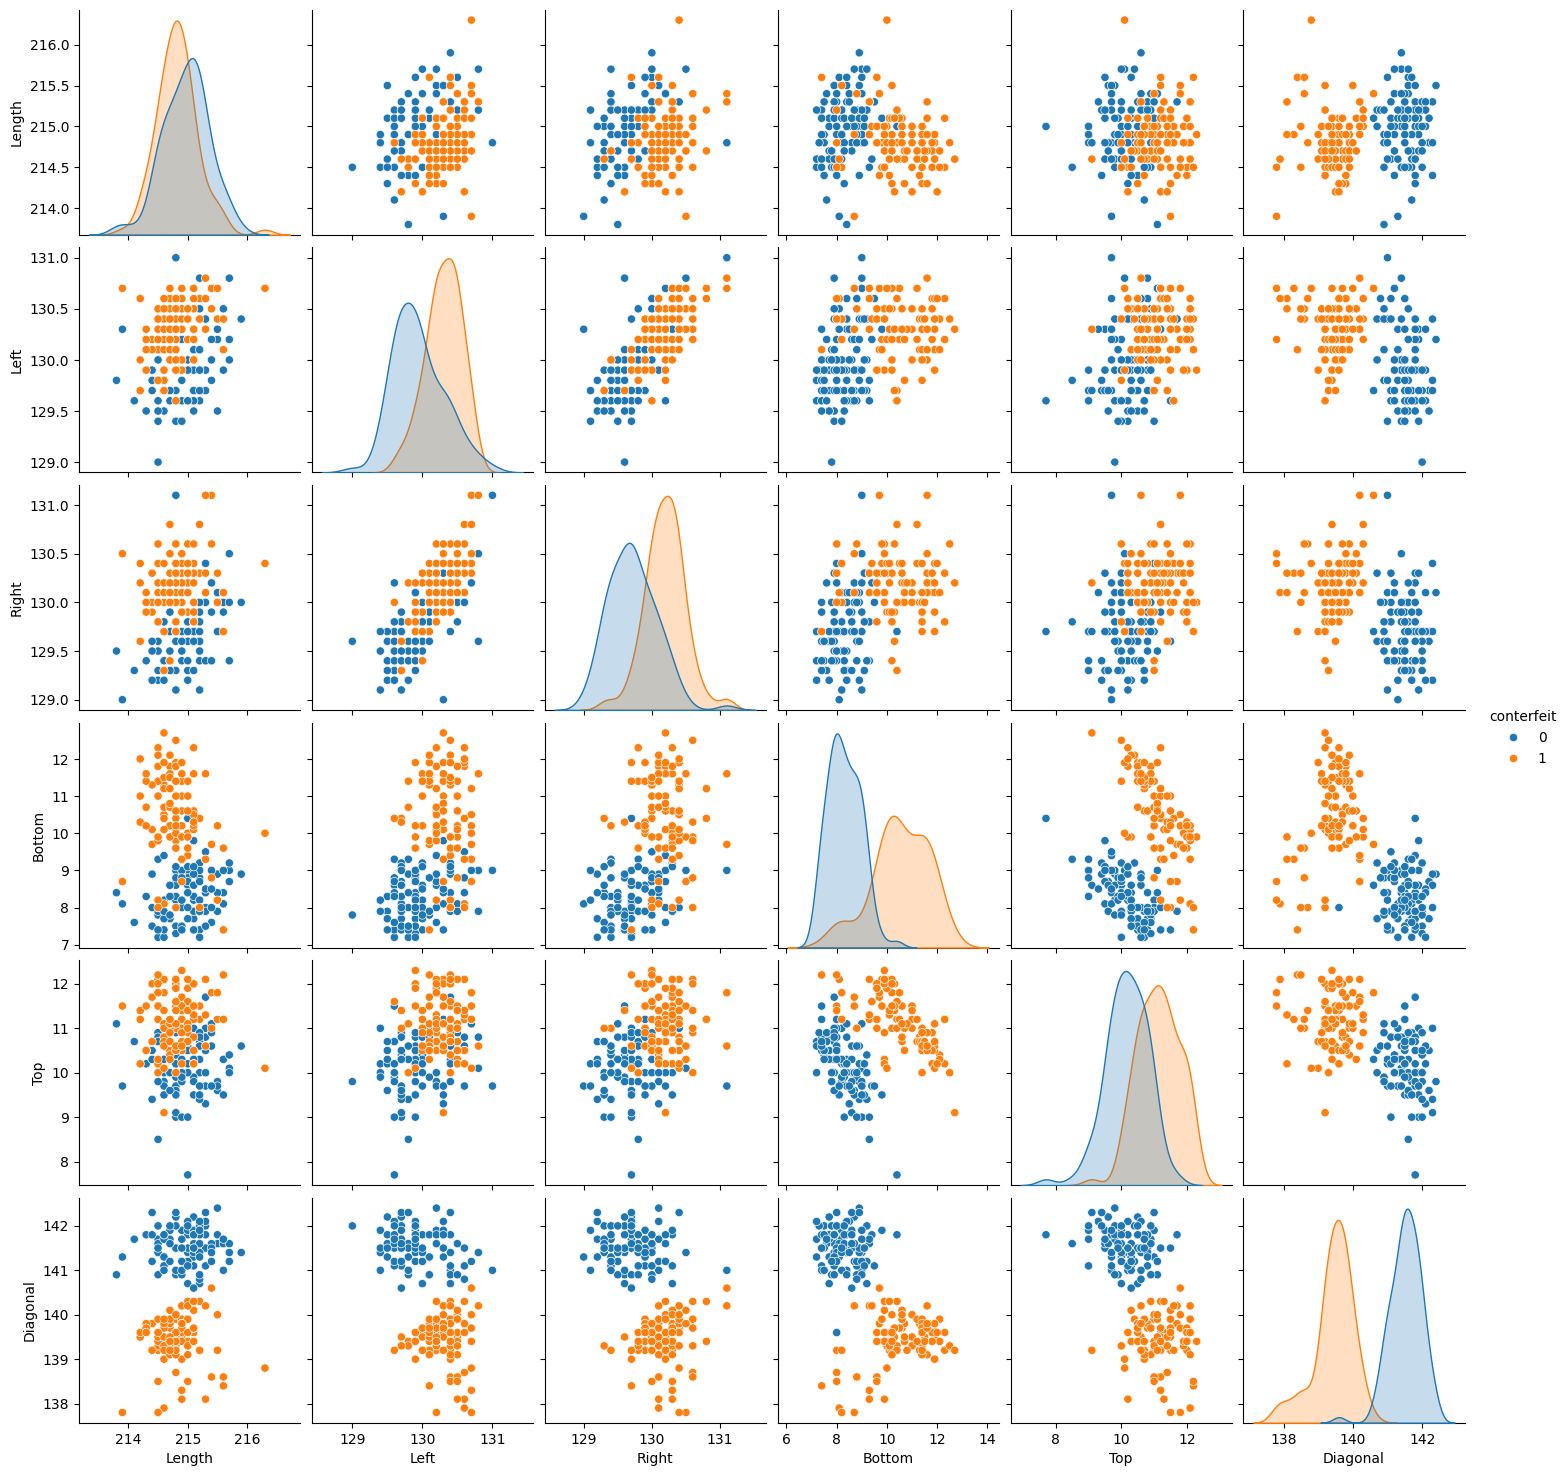

In [25]:
sns.pairplot(df, hue='conterfeit')